In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
num_points = 1000
mmin, mmax = 0, 50
noise_std = 0.2

# Create Sine wave
X = np.linspace(mmin, mmax, num=num_points)
y_true = np.sin(X)

# Create noise array
noise_array = np.random.normal(0, noise_std, 1000)
y = y_true + noise_array

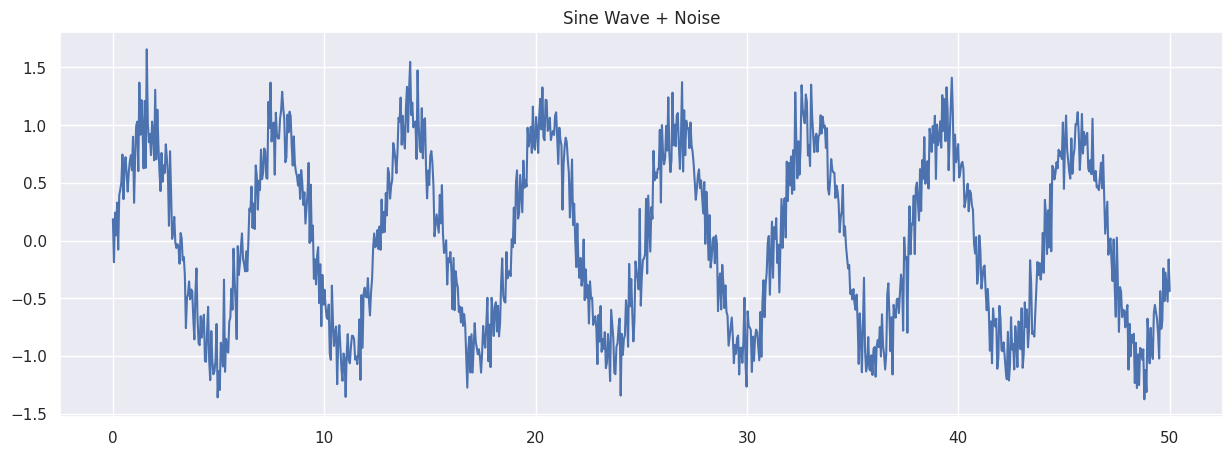

In [ ]:
# Plot sine wave (with noise)
plt.figure(figsize=(15, 5))
plt.plot(X, y)
plt.title('Sine Wave + Noise')
plt.show()

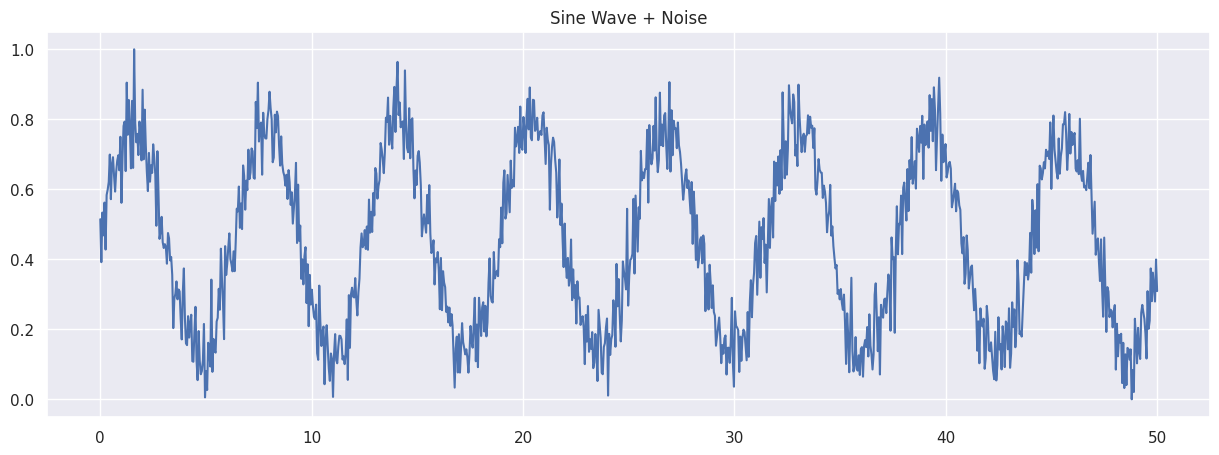

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
y_reshape = y.reshape(-1,1)
dataset = scaler.fit_transform(y_reshape)
plt.figure(figsize=(15, 5))
plt.plot(X, dataset)
plt.title('Sine Wave + Noise')
plt.show()

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

800 200


In [ ]:
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
798/798 - 4s - loss: 0.0743 - 4s/epoch - 5ms/step
Epoch 2/10
798/798 - 1s - loss: 0.0191 - 1s/epoch - 2ms/step
Epoch 3/10
798/798 - 1s - loss: 0.0105 - 1s/epoch - 2ms/step
Epoch 4/10
798/798 - 1s - loss: 0.0092 - 1s/epoch - 2ms/step
Epoch 5/10
798/798 - 1s - loss: 0.0092 - 1s/epoch - 2ms/step
Epoch 6/10
798/798 - 2s - loss: 0.0092 - 2s/epoch - 2ms/step
Epoch 7/10
798/798 - 1s - loss: 0.0092 - 1s/epoch - 2ms/step
Epoch 8/10
798/798 - 2s - loss: 0.0091 - 2s/epoch - 2ms/step
Epoch 9/10
798/798 - 2s - loss: 0.0092 - 2s/epoch - 3ms/step
Epoch 10/10
798/798 - 1s - loss: 0.0091 - 1s/epoch - 2ms/step


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

7/7 [==============================] - 0s 3ms/step
Train Score: 0.29 RMSE
Test Score: 0.26 RMSE


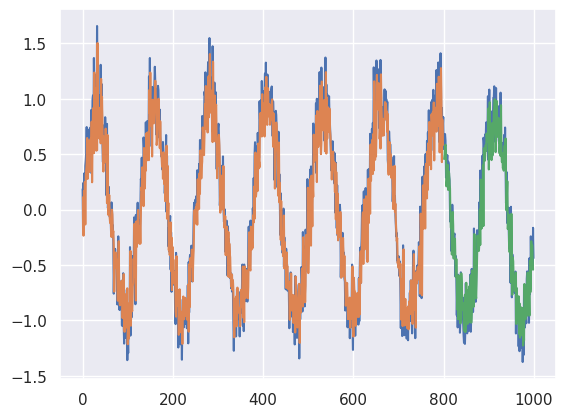

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

---

using a better window size

---

In [ ]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
796/796 - 3s - loss: 0.0170 - 3s/epoch - 4ms/step
Epoch 2/10
796/796 - 2s - loss: 0.0069 - 2s/epoch - 3ms/step
Epoch 3/10
796/796 - 3s - loss: 0.0067 - 3s/epoch - 4ms/step
Epoch 4/10
796/796 - 2s - loss: 0.0066 - 2s/epoch - 3ms/step
Epoch 5/10
796/796 - 1s - loss: 0.0066 - 1s/epoch - 2ms/step
Epoch 6/10
796/796 - 1s - loss: 0.0065 - 1s/epoch - 2ms/step
Epoch 7/10
796/796 - 1s - loss: 0.0066 - 1s/epoch - 2ms/step
Epoch 8/10
796/796 - 2s - loss: 0.0065 - 2s/epoch - 2ms/step
Epoch 9/10
796/796 - 2s - loss: 0.0065 - 2s/epoch - 2ms/step
Epoch 10/10
796/796 - 2s - loss: 0.0066 - 2s/epoch - 3ms/step


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

7/7 [==============================] - 0s 4ms/step
Train Score: 0.24 RMSE
Test Score: 0.23 RMSE


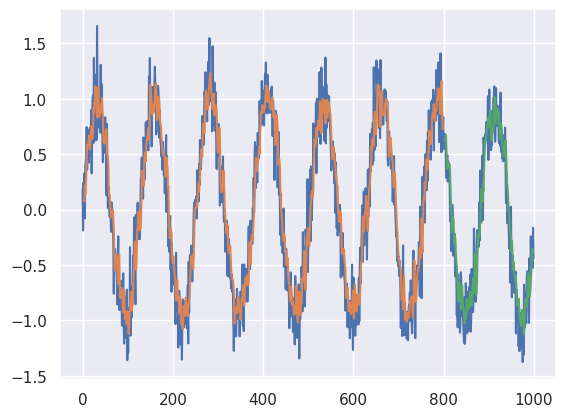

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

---
Better method

---


In [ ]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
796/796 - 4s - loss: 0.0385 - 4s/epoch - 5ms/step
Epoch 2/10
796/796 - 2s - loss: 0.0068 - 2s/epoch - 2ms/step
Epoch 3/10
796/796 - 2s - loss: 0.0065 - 2s/epoch - 3ms/step
Epoch 4/10
796/796 - 2s - loss: 0.0066 - 2s/epoch - 3ms/step
Epoch 5/10
796/796 - 2s - loss: 0.0066 - 2s/epoch - 2ms/step
Epoch 6/10
796/796 - 2s - loss: 0.0066 - 2s/epoch - 2ms/step
Epoch 7/10
796/796 - 2s - loss: 0.0065 - 2s/epoch - 2ms/step
Epoch 8/10
796/796 - 2s - loss: 0.0066 - 2s/epoch - 2ms/step
Epoch 9/10
796/796 - 2s - loss: 0.0066 - 2s/epoch - 2ms/step
Epoch 10/10
796/796 - 2s - loss: 0.0065 - 2s/epoch - 3ms/step


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

7/7 [==============================] - 0s 3ms/step
Train Score: 0.24 RMSE
Test Score: 0.23 RMSE


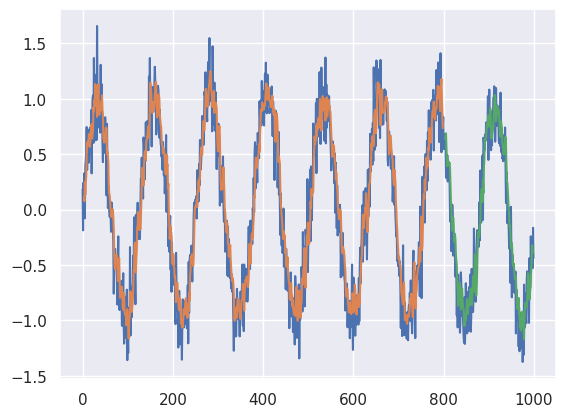

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

---

---

In [ ]:
np.random.seed(1)

def gen_random_walk(n_step=100):
    if n_step < 30:
        print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

    w = np.zeros(n_step)

    for i in range(1,n_step):
        yi = np.random.choice([1,-1])
        w[i] = w[i-1]+(yi/np.sqrt(n_step))

    return w

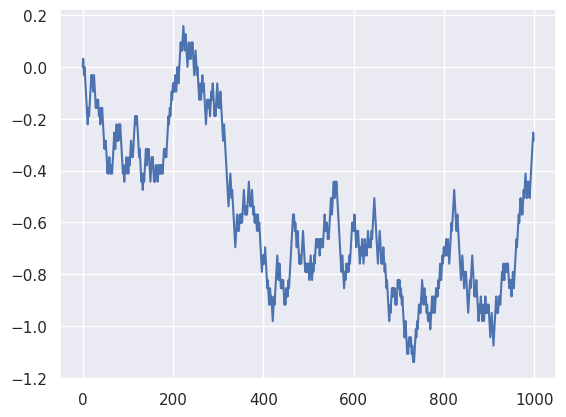

In [ ]:
np.random.seed(0)
b = gen_random_walk(1000)
plt.plot(b)

In [ ]:
num_points = 1000
mmin, mmax = 0, 50
noise_std = 0.2
X = np.linspace(mmin, mmax, num=num_points)
y = b
scaler = MinMaxScaler(feature_range=(0, 1))
y_reshape = y.reshape(-1,1)
dataset = scaler.fit_transform(y_reshape)
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

800 200


In [ ]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1 ))

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
796/796 - 3s - loss: 0.0178 - 3s/epoch - 4ms/step
Epoch 2/10
796/796 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 3/10
796/796 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 4/10
796/796 - 3s - loss: 0.0010 - 3s/epoch - 4ms/step
Epoch 5/10
796/796 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 6/10
796/796 - 2s - loss: 9.7818e-04 - 2s/epoch - 2ms/step
Epoch 7/10
796/796 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 8/10
796/796 - 2s - loss: 9.7982e-04 - 2s/epoch - 2ms/step
Epoch 9/10
796/796 - 2s - loss: 9.6422e-04 - 2s/epoch - 2ms/step
Epoch 10/10
796/796 - 2s - loss: 9.8030e-04 - 2s/epoch - 2ms/step


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(f'Train Score: {trainScore} RMSE')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(f'Test Score: {testScore} RMSE')

7/7 [==============================] - 0s 4ms/step
Train Score: 0.038473691492768324 RMSE
Test Score: 0.04185342801745085 RMSE


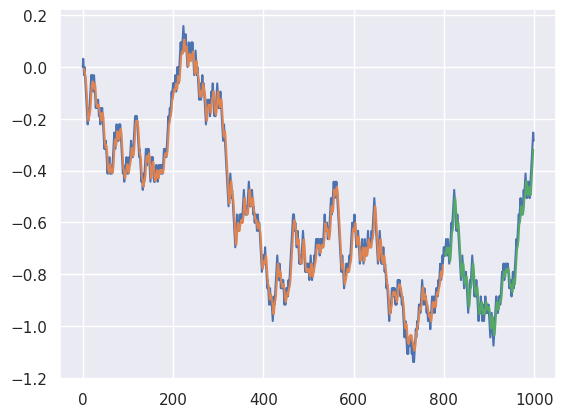

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()